In [3]:
import pandas as pd
from sqlalchemy import create_engine, text


user="root"
password="predestination"
host="localhost"
port=3306
database="superstore"

#connect to mysql using sqlalchemy
engine=create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")

#test the connection
with engine.connect() as conn:
    result= conn.execute(text("SHOW TABLES;"))
    print("Tables in database:", [row[0] for row in result])

Tables in database: ['customers', 'products', 'sales']


In [4]:
#Load full sales data joined with customers & products

query="""
select 
c.customer_id, c.name, c.segment, c.country, c.city, c.state, c.postal_code, c.region, p.product_id, p.category, p.sub_category,
p.product_name, s.sale_id, s.order_id, s.customer_id, s.product_id, s.order_date, s.order_date_clean, s.ship_date, s.ship_mode, s.sales, s.quantity,
s.discount, s.profit
from sales s
join customers c on s.customer_id=c.customer_id
join products p on s.product_id=p.product_id;
"""


df=pd.read_sql(query,engine)
pd.set_option('display.max.columns',27)
df1=df.copy()
df1

,customer_id,name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sale_id,order_id,customer_id,product_id,order_date,order_date_clean,ship_date,ship_mode,sales,quantity,discount,profit
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture_Chairs_Hon Deluxe Fabric Upholstered...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",CA-2016-152156_1,CA-2016-152156,CG-12520,Furniture_Chairs_Hon Deluxe Fabric Upholstered...,11-08-2016,2016-08-11,11-11-2016,Second Class,731.9400,3,0.00,219.5820
1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture_Bookcases_Bush Somerset Collection B...,Furniture,Bookcases,Bush Somerset Collection Bookcase,CA-2016-152156_0,CA-2016-152156,CG-12520,Furniture_Bookcases_Bush Somerset Collection B...,11-08-2016,2016-08-11,11-11-2016,Second Class,261.9600,2,0.00,41.9136
2,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,Office Supplies_Labels_Self-Adhesive Address L...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,CA-2016-138688_2,CA-2016-138688,DV-13045,Office Supplies_Labels_Self-Adhesive Address L...,06-12-2016,2016-12-06,6/16/2016,Second Class,14.6200,2,0.00,6.8714
3,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies_Storage_Eldon Fold 'N Roll Car...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,US-2015-108966_4,US-2015-108966,SO-20335,Office Supplies_Storage_Eldon Fold 'N Roll Car...,10-11-2015,2015-11-10,10/18/2015,Standard Class,22.3680,2,0.20,2.5164
4,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture_Tables_Bretford CR4500 Series Slim R...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,US-2015-108966_3,US-2015-108966,SO-20335,Furniture_Tables_Bretford CR4500 Series Slim R...,10-11-2015,2015-11-10,10/18/2015,Standard Class,957.5775,5,0.45,-383.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71940,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,44312,East,Furniture_Tables_Bevis 36 x 72 Conference Tables,Furniture,Tables,Bevis 36 x 72 Conference Tables,CA-2017-102407_4291,CA-2017-102407,AT-10435,Furniture_Tables_Bevis 36 x 72 Conference Tables,12-09-2017,2017-09-12,12/13/2017,Second Class,896.3280,9,0.20,22.4082
71941,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,44312,East,Office Supplies_Art_Newell 314,Office Supplies,Art,Newell 314,CA-2017-102407_4290,CA-2017-102407,AT-10435,Office Supplies_Art_Newell 314,12-09-2017,2017-09-12,12/13/2017,Second Class,11.1600,2,0.00,2.7900
71942,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,44312,East,Furniture_Furnishings_DAX Value U-Channel Docu...,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",CA-2016-100468_1503,CA-2016-100468,AT-10435,Furniture_Furnishings_DAX Value U-Channel Docu...,11/24/2016,2016-11-24,12-01-2016,Standard Class,9.9400,2,0.00,3.0814
71943,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,44312,East,Technology_Phones_iKross Bluetooth Portable Ke...,Technology,Phones,iKross Bluetooth Portable Keyboard + Cell Phon...,CA-2016-100468_1502,CA-2016-100468,AT-10435,Technology_Phones_iKross Bluetooth Portable Ke...,11/24/2016,2016-11-24,12-01-2016,Standard Class,33.5200,2,0.20,3.3520


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71945 entries, 0 to 71944
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71945 non-null  object 
 1   name              71945 non-null  object 
 2   segment           71945 non-null  object 
 3   country           71945 non-null  object 
 4   city              71945 non-null  object 
 5   state             71945 non-null  object 
 6   postal_code       71945 non-null  int64  
 7   region            71945 non-null  object 
 8   product_id        71945 non-null  object 
 9   category          71945 non-null  object 
 10  sub_category      71945 non-null  object 
 11  product_name      71945 non-null  object 
 12  sale_id           71945 non-null  object 
 13  order_id          71945 non-null  object 
 14  customer_id       71945 non-null  object 
 15  product_id        71945 non-null  object 
 16  order_date        71945 non-null  object

In [ ]:
df1.info()

In [6]:
#check nulls
df1.isnull().sum()

#remove duplicates
df1.drop_duplicates()


# Convert dates
df1['ship_date'] = pd.to_datetime(df1['ship_date'], errors='coerce')
df1['order_date_clean'] = pd.to_datetime(df1['order_date_clean'], errors='coerce')


#Create month and year column

df1['month']=df1['order_date_clean'].dt.to_period('M')
df1['year']=df1['order_date_clean'].dt.year



In [7]:
df1

,customer_id,name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sale_id,order_id,customer_id,product_id,order_date,order_date_clean,ship_date,ship_mode,sales,quantity,discount,profit,month,year
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture_Chairs_Hon Deluxe Fabric Upholstered...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",CA-2016-152156_1,CA-2016-152156,CG-12520,Furniture_Chairs_Hon Deluxe Fabric Upholstered...,11-08-2016,2016-08-11,2016-11-11,Second Class,731.9400,3,0.00,219.5820,2016-08,2016
1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture_Bookcases_Bush Somerset Collection B...,Furniture,Bookcases,Bush Somerset Collection Bookcase,CA-2016-152156_0,CA-2016-152156,CG-12520,Furniture_Bookcases_Bush Somerset Collection B...,11-08-2016,2016-08-11,2016-11-11,Second Class,261.9600,2,0.00,41.9136,2016-08,2016
2,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,Office Supplies_Labels_Self-Adhesive Address L...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,CA-2016-138688_2,CA-2016-138688,DV-13045,Office Supplies_Labels_Self-Adhesive Address L...,06-12-2016,2016-12-06,NaT,Second Class,14.6200,2,0.00,6.8714,2016-12,2016
3,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies_Storage_Eldon Fold 'N Roll Car...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,US-2015-108966_4,US-2015-108966,SO-20335,Office Supplies_Storage_Eldon Fold 'N Roll Car...,10-11-2015,2015-11-10,NaT,Standard Class,22.3680,2,0.20,2.5164,2015-11,2015
4,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture_Tables_Bretford CR4500 Series Slim R...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,US-2015-108966_3,US-2015-108966,SO-20335,Furniture_Tables_Bretford CR4500 Series Slim R...,10-11-2015,2015-11-10,NaT,Standard Class,957.5775,5,0.45,-383.0310,2015-11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71940,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,44312,East,Furniture_Tables_Bevis 36 x 72 Conference Tables,Furniture,Tables,Bevis 36 x 72 Conference Tables,CA-2017-102407_4291,CA-2017-102407,AT-10435,Furniture_Tables_Bevis 36 x 72 Conference Tables,12-09-2017,2017-09-12,NaT,Second Class,896.3280,9,0.20,22.4082,2017-09,2017
71941,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,44312,East,Office Supplies_Art_Newell 314,Office Supplies,Art,Newell 314,CA-2017-102407_4290,CA-2017-102407,AT-10435,Office Supplies_Art_Newell 314,12-09-2017,2017-09-12,NaT,Second Class,11.1600,2,0.00,2.7900,2017-09,2017
71942,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,44312,East,Furniture_Furnishings_DAX Value U-Channel Docu...,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",CA-2016-100468_1503,CA-2016-100468,AT-10435,Furniture_Furnishings_DAX Value U-Channel Docu...,11/24/2016,2016-11-24,2016-12-01,Standard Class,9.9400,2,0.00,3.0814,2016-11,2016
71943,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,44312,East,Technology_Phones_iKross Bluetooth Portable Ke...,Technology,Phones,iKross Bluetooth Portable Keyboard + Cell Phon...,CA-2016-100468_1502,CA-2016-100468,AT-10435,Technology_Phones_iKross Bluetooth Portable Ke...,11/24/2016,2016-11-24,2016-12-01,Standard Class,33.5200,2,0.20,3.3520,2016-11,2016


In [8]:
# EDA- Sales over time

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='month'>

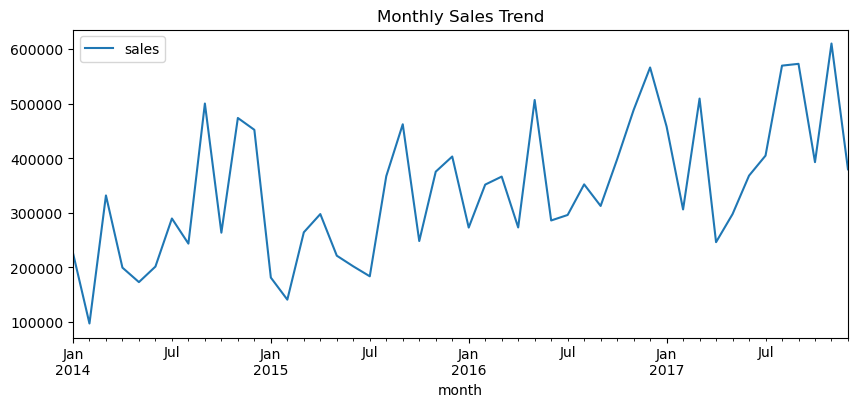

In [9]:
monthly_sales=df1.groupby('month').agg({'sales':'sum','profit':'sum'}).reset_index()
monthly_sales.plot(x='month',y='sales',kind='line',title='Monthly Sales Trend', figsize=(10,4))

<Axes: xlabel='month', ylabel='total_order'>

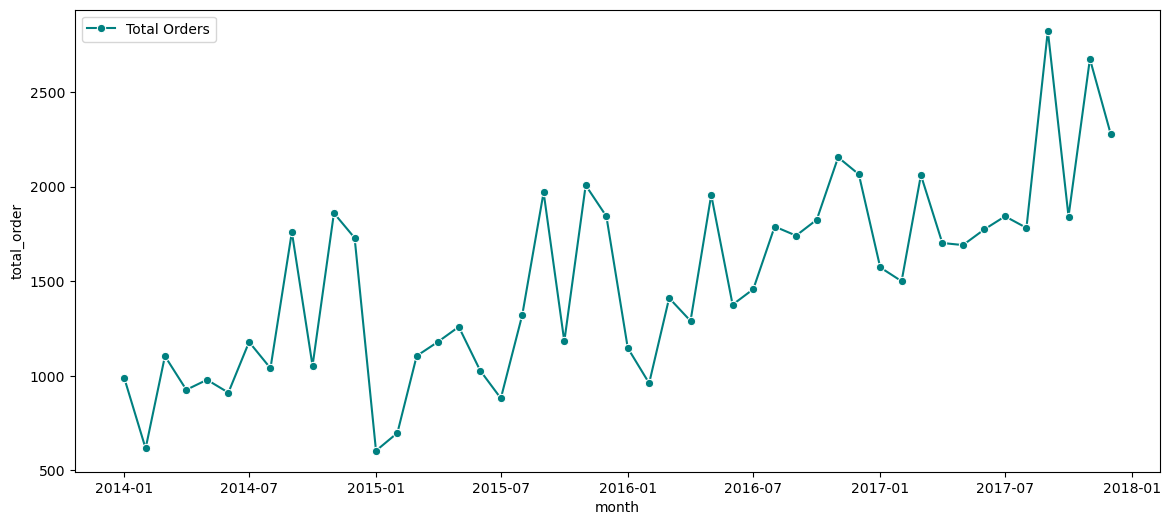

In [10]:
#Number of order by month

monthly_orders=df1.groupby('month').agg({'order_id':'count'}).reset_index()
monthly_orders.rename(columns={'order_id':'total_order'},inplace=True)


# Convert Period to datetime
monthly_orders['month'] = monthly_orders['month'].dt.to_timestamp()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_orders, x='month', y='total_order', label='Total Orders', marker='o', color='teal')

<Axes: xlabel='month', ylabel='total_unique_orders'>

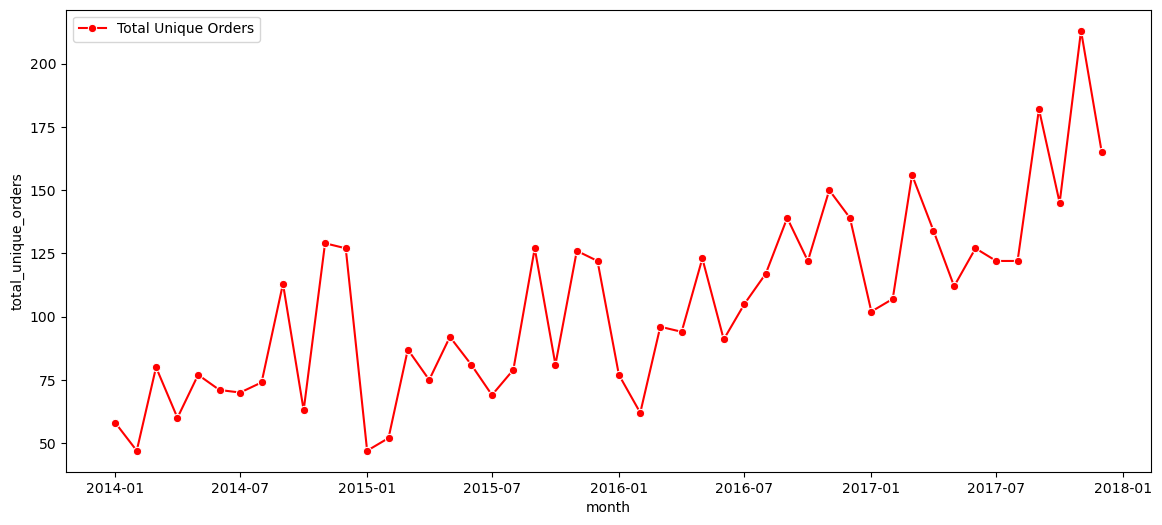

In [33]:
#Number of unique order by month

monthly_unique_orders=df1.groupby('month').agg({'order_id':'nunique'}).reset_index()
monthly_unique_orders.rename(columns={'order_id': 'total_unique_orders'}, inplace=True)

# Convert Period to datetime
monthly_unique_orders['month'] = monthly_unique_orders['month'].dt.to_timestamp()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_unique_orders,x='month',y='total_unique_orders', label='Total Unique Orders', marker='o', color='red')

In [35]:
monthly_orders_summary = pd.merge(monthly_orders, monthly_unique_orders, on='month')
monthly_orders_summary

,month,total_order,total_unique_orders
0,2014-01-01,989,58
1,2014-02-01,616,47
2,2014-03-01,1104,80
3,2014-04-01,926,60
4,2014-05-01,979,77
5,2014-06-01,911,71
6,2014-07-01,1179,70
7,2014-08-01,1040,74
8,2014-09-01,1760,113
9,2014-10-01,1053,63


Text(0.5, 1.0, 'Total Profit By Category')

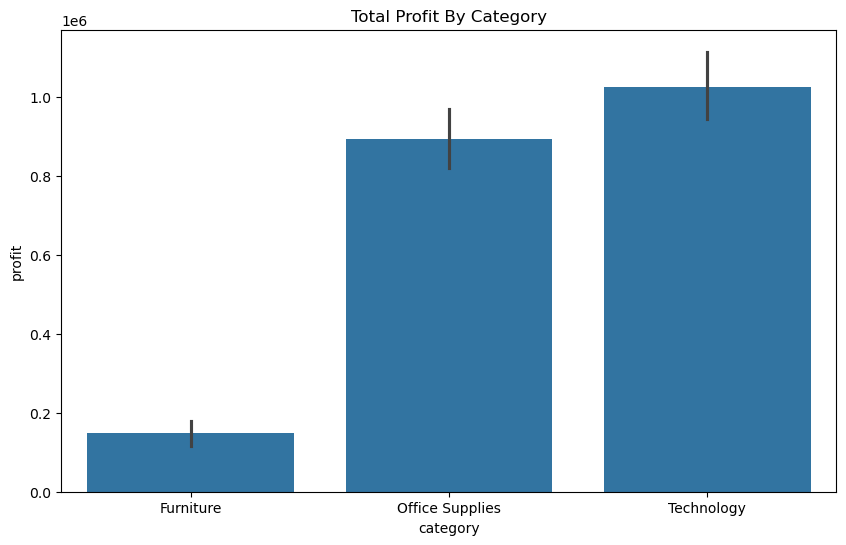

In [13]:
# 🌍 Profit by category

plt.figure(figsize=(10,6))
sns.barplot(data=df1,x='category',y='profit',estimator=sum)
plt.title("Total Profit By Category")

C:\Users\acer\AppData\Local\Temp\ipykernel_23188\3536920500.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1,x='region',y='profit',estimator=sum,ci=None)


Text(0.5, 1.0, 'Total Profit By Region')

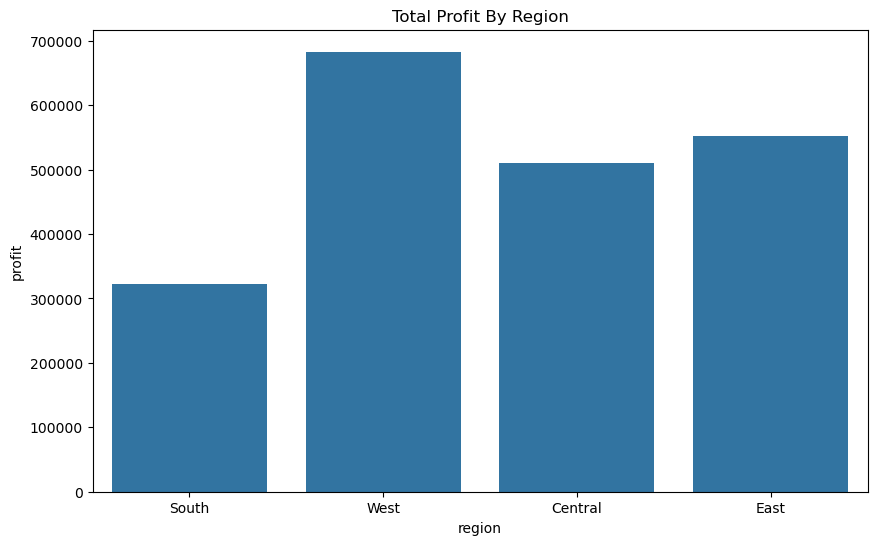

In [14]:
# 🌍 Profit by Region

plt.figure(figsize=(10,6))
sns.barplot(data=df1,x='region',y='profit',estimator=sum,ci=None)
plt.title("Total Profit By Region")

Text(0.5, 1.0, 'Correlation Hashmap')

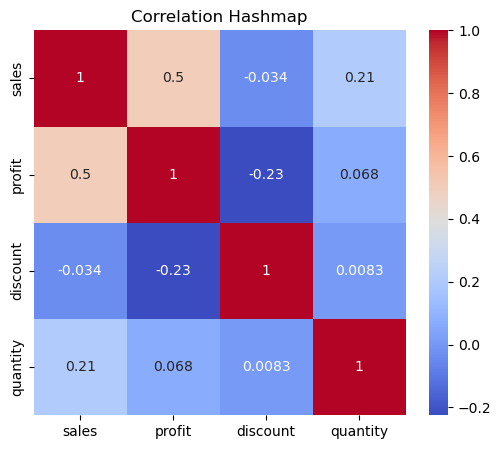

In [15]:
# 🔥 Correlation Heatmap

corr=df1[['sales','profit','discount','quantity']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Hashmap")

In [16]:
# 📊 Outlier Boxplots

from scipy import stats
z_scores=stats.zscore(df1[['sales','profit','discount']])
outlier=(abs(z_scores)>3).any(axis=1)
outlier_df=df[outlier]
print(f"Outliers found:{outlier_df.shape[0]}")

Outliers found:3407


Text(0.5, 1.0, 'Boxplot of Sales, Profit, Discount')

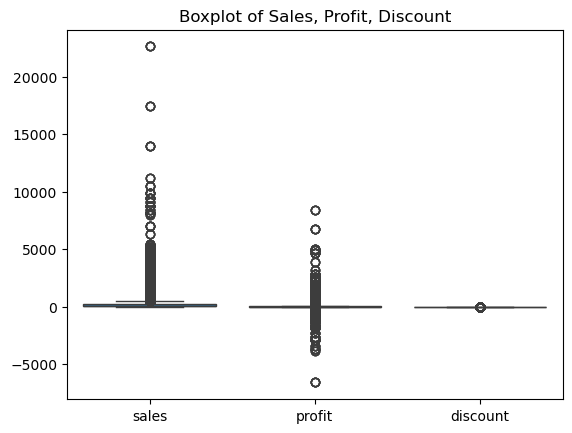

In [17]:
sns.boxplot(data=df1[['sales','profit','discount']])
plt.title("Boxplot of Sales, Profit, Discount")

In [24]:
# 🧠 Outlier Detection (Z-Score Method)

z_scores = stats.zscore(df1[['sales', 'profit', 'discount']])
outliers = (abs(z_scores) > 3).any(axis=1)
df1['is_outlier'] = outliers
top_sales_outliers = df1[outliers].sort_values('sales', ascending=False).head(10)

In [ ]:
# 🎯 Top Outlier Customers by Sales

plt.figure()
sns.barplot(data=top_sales_outliers, x='customer_id', y='sales', palette='viridis')
plt.title("Top 10 Outlier Customers by Sales")
plt.xticks(rotation=45)
plt.show()

In [37]:
df1.to_csv('Completed-EDA-Analysis.csv',index=False)